In [289]:
# Just some figuring out how heavy we are
# https://www.doubleradius.com/site/stores/baicells/baicells-nova-233-gen-2-enodeb-outdoor-base-station-datasheet.pdf
# Unsure how massive antenna are, guessing 1 kg
m_payload = 4.4 + 1
P_payload = 45

wingSpan = 10
wingChord = 0.5
wingArea = wingSpan * wingChord
solarFill = 0.85
solarArea = wingArea * solarFill

# Guesses
P_solar_cap = 1000
P_prop = 600

# Mostly taken from Oettershagen2017Design
m_struct = 6 # Guessing
m_prop = 0.0011 * P_prop
m_solar = 0.59 * solarArea
m_mppt = 0.422 * 0.422e-3 * P_solar_cap
m_av = 1.22
bat_Wh_cap = 1500
# From Oettershagen
#m_bat = bat_Wh_cap / 251
# From hypothetical Licerion/Sionpower Lithium-metal cells
m_bat = bat_Wh_cap / 650

mass = m_struct + m_prop + m_solar + m_mppt + m_av + m_payload + m_bat
print('Mass is %.2f kg' % mass)

Mass is 18.27 kg


2354.37386856092
2020-07-02 12:00:00-04:00


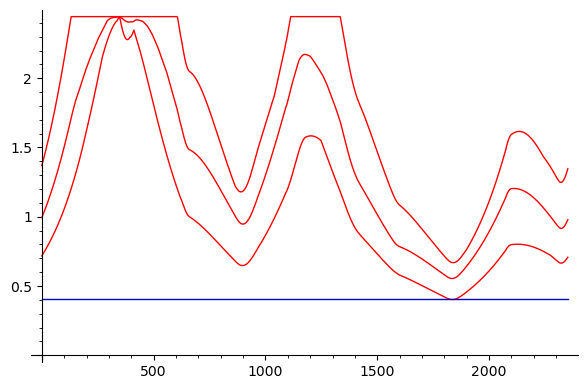

mSoc = 47.70%


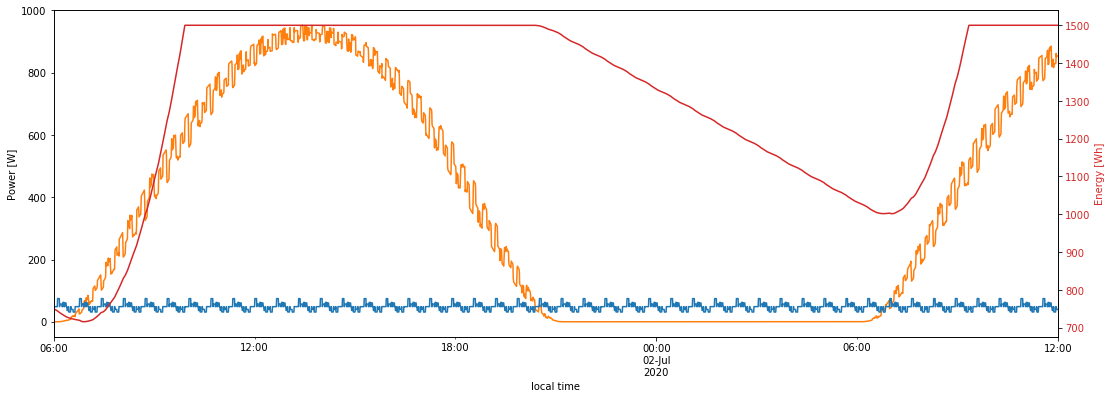

In [295]:
import matplotlib.pyplot as plt


if 'thesis.Trajectory' in sys.modules: del sys.modules['thesis.Trajectory']
from thesis.Trajectory import Trajectory

if 'thesis.Aircraft' in sys.modules: del sys.modules['thesis.Aircraft']
from thesis.Aircraft import Aircraft

if 'thesis.Flight' in sys.modules: del sys.modules['thesis.Flight']
from thesis.Flight import Flight

if 'thesis.Scenario' in sys.modules: del sys.modules['thesis.Scenario']
from thesis.Scenario import Scenario

scene = Scenario()
with seed(0):
    scene.addRandomGroundUsersUniformCircular(10, r=1000) 
    
# X Y R Z
trajectory = Trajectory([
    (0, 10, 250, 1100),
    (2000, 0, 200, 1100),
    (2000, 2000, 300, 1130),
    (1000, 1000, 400, 1140),
    (0, 2000, 500, 1150),
    (1000, 3000, 400, 1160),
    (3000, 3000, 300, 1150),
    (2700, 1000, 250, 1130),
    (3000, -1000, 200, 1120)
])
    
#craft = Aircraft(mass = 40, wingSpan = 5.65, e0 = 0.92, chord = 0.305)
craft = Aircraft(mass = mass, wingSpan = wingSpan, e0 = 0.92, chord = wingChord)
alphas = [5 for p in trajectory.pieces]

trajectory.render() + point((0,0,0), size=50000)

exFlight = Flight(craft, trajectory, alphas)
print(exFlight.cycleTime)
import pandas as pd
times = pd.date_range(start='2020-07-01T06', end='2020-07-02T12', freq='30S', tz='America/Detroit')
#show(trajectory.render(color='blue') + trajectory.pieces[0].render(color='red') + trajectory.pieces[1].render(color='green'))
poses = exFlight.toPoses(times.to_series())
#poses.azimuth.plot()
#pd.to_timedelta(times.freq).total_seconds()

from matplotlib.pyplot import figure

solar = craft.calcSolarPower(poses, 43, -84)
battery = craft.calcBatteryCharge(poses, solar, bat_Wh_cap)


fix, ax1 = plt.subplots(figsize=(18,6))
ax1.set_xlabel('local time')
ax1.set_ylabel('Power [W]')

solar.plot(color='tab:orange')
poses.power.plot(color='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Energy [Wh]', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
battery.plot(color='tab:red')

j = Judge(scene, craft)
score, thru, meanFlightPower, cycleTime, positions, thruPlot = j.judgeFlight(exFlight, dbg = True)
show(thruPlot)

print('mSoc = %.2f%%' % (battery.min() / bat_Wh_cap * 100))

In [114]:
import pandas as pd
times = pd.date_range(start='2020-07-01T09', end='2020-07-01T10', freq='2Min', tz='America/Detroit')
times['2020-07-01T09:30:15':'2020-07-01T09:45']

TypeError: slice indices must be integers or None or have an __index__ method

0, 55, 87, 276 min/avg/max/sum kb/J


69, 79, 91, 478 min/avg/max/sum kb/J


52, 82, 92, 496 min/avg/max/sum kb/J


51, 75, 93, 453 min/avg/max/sum kb/J


45, 82, 93, 496 min/avg/max/sum kb/J


58, 86, 98, 520 min/avg/max/sum kb/J


93, 95, 98, 575 min/avg/max/sum kb/J


69, 87, 98, 522 min/avg/max/sum kb/J


73, 89, 98, 536 min/avg/max/sum kb/J


95, 97, 98, 582 min/avg/max/sum kb/J


88, 94, 101, 569 min/avg/max/sum kb/J


90, 98, 101, 591 min/avg/max/sum kb/J


89, 97, 101, 587 min/avg/max/sum kb/J


92, 97, 101, 587 min/avg/max/sum kb/J


63, 88, 101, 532 min/avg/max/sum kb/J


63, 94, 108, 569 min/avg/max/sum kb/J


80, 101, 108, 608 min/avg/max/sum kb/J


72, 97, 108, 583 min/avg/max/sum kb/J


0, 84, 108, 507 min/avg/max/sum kb/J


100, 104, 108, 626 min/avg/max/sum kb/J

0.108230225414693 18.599249959936774 661.804568577070*(0.0249757002415259/pi + 0.00910710931856906)*abs(1/(-0.000210263571643776/pi + 2.36767787049781)) + 637.389139594539*(0.117567243871607/pi + 0.0211148562064599)*abs(1/(-0.00154943198792643/pi + 5.14201186961265)) + 452.259505430340*(0.0961298109006457/pi + 0.0151013761173523)*abs(1/(-0.00206145998105832/pi + 4.64712099013259)) + 386.857674211207*(0.132485320069986/pi + 0.0308463899773839)*abs(1/(-0.00485792379261047/pi + 5.45308209780458)) + 244.576685351312/pi + 0.178767234135076*abs(329.41044037489024/pi - 47.61902497848612) + 62.1114072251537 2461.18456473333


Graphics3d Object

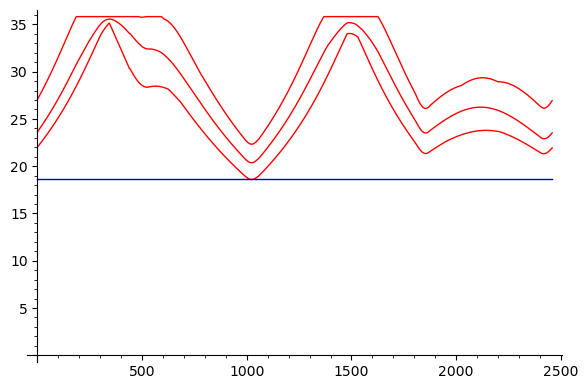

In [66]:
if 'thesis.EvalHelper' in sys.modules: del sys.modules['thesis.EvalHelper']
from thesis.EvalHelper import Judge
if 'thesis.Genetics' in sys.modules: del sys.modules['thesis.Genetics']
from thesis.Genetics import Chromosome, GARunner

j = Judge(scene, craft)

runner = GARunner(
    # Number of individuals
    5,
    # Generate new individual
    lambda: j.newChromosome(),
    # Fitness function
    lambda chromo: j.judgeChromosome(chromo)[0],
    # Per-bit probability of mutation in children
    pMutation = 0.05
)

from tqdm.notebook import tqdm

allFitness = []



for gen in tqdm(range(20)):
    fitnesses = runner.iterate(lambda x: tqdm(x, leave=False))
    print('%d, %d, %d, %d min/avg/max/sum kb/J' % (
        min(fitnesses)*1e3,
        sum(fitnesses) / len(fitnesses)*1e3,
        max(fitnesses)*1e3,
        sum(fitnesses)*1e3
    ))
    allFitness.append(fitnesses)
    
score, thru, meanFlightPower, cycleTime, positions, thruPlot = j.judgeChromosome(runner.population[0], dbg=True)
print(score, thru, meanFlightPower, cycleTime)
show(positions)
show(thruPlot)

108.230225414693 kb/J
18.599249959936774 min Mbps
172 W
2461 s


Graphics3d Object

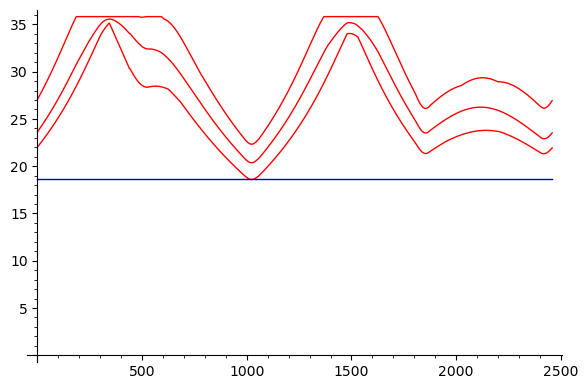

Graphics3d Object

In [67]:
score, thru, meanFlightPower, cycleTime, positions, thruPlot = j.judgeChromosome(runner.population[0], dbg=True)
print(score*1e3, 'kb/J')
print(thru, 'min Mbps')
print(round(meanFlightPower.n()), 'W')
print(round(cycleTime), 's')
show(positions)
show(thruPlot)
j.chromosomeToFlight(runner.population[0])._trajectory.render() + scene.render()

In [68]:
if 'thesis.simulation' in sys.modules: del sys.modules['thesis.simulation']
from ns.core import Vector, MilliSeconds, Seconds
from thesis.simulation import SimulationContext
import ns.mobility
from ns.mobility import PathMobilityModelSegments as Seg
import ns.flow_monitor

flh = ns.flow_monitor.FlowMonitorHelper()

with SimulationContext() as sim:
    sim.addEnbFlight(j.chromosomeToFlight(runner.population[0]))
    
    # For testing a straight-away path
    #mobile = ns.mobility.PathMobilityModel()
    #mobile.AddSegment(ns.mobility.PathMobilityModelSegments.LineSegment(ns.core.Vector(2000, 0, 0), ns.core.Vector(10000, 0, 0), 100))
    #sim.enbMobilities.append(mobile)
        
    #sim.addEnbFlight(flight)
    for user in scene.users:
        sim.addUser(*user)
    sim._finalizeNodes()
    
    MbpsPerDirectionTarget = 20 * 1024 * 1024
    packetSize = 1024 * 8
    packetsPerSecond = MbpsPerDirectionTarget / packetSize
    interval = 1 / packetsPerSecond * 1e6
    
    print('interval is', interval)
    
    for idx in range(len(scene.users)):
        sim.createTrafficGenerator(idx, False, interval = int(interval+1))
        #sim.createTrafficGenerator(idx, True, interval = int(interval+1))
        
    sim.lteHelper.EnableRlcTraces()
    flh.InstallAll()
    
    
    dt = int(2500)
    
    sim.startAndMonitorApps(resolution = 10)
    sim.stopAppsAt(dt)
    
    sim.run(dt + 10)
    
    rx = [
        sim.serverApps.Get(idx).GetTotalRx()
        for idx
        in range(sim.serverApps.GetN())
    ]
    
    print(round(sum(rx) / dt / 1e6 * 8, 2), 'Mbps', rx)
    print(sim.serverAppStats)

interval is 390.625000000000
7.0.0.2
7.0.0.3
7.0.0.4
7.0.0.5
7.0.0.6
7.0.0.7
7.0.0.8
7.0.0.9
7.0.0.10
7.0.0.11


14.7 Mbps [458890240, 462853120, 451948544, 471155712, 449183744, 449242112, 461441024, 452928512, 458439680, 476342272]
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1559552, 1559552, 1356800, 1766400, 1510400, 1330176, 1559552, 1557504, 1559552, 2164736], [1564672, 1564672, 1566720, 1771520, 1565696, 1417216, 1581056, 1565696, 1566720, 2172928], [1567744, 1567744, 1567744, 1767424, 1567744, 1567744, 1765376, 1567744, 1567744, 2174976], [1563648, 1563648, 1561600, 1920000, 1562624, 1562624, 1761280, 1561600, 1561600, 2166784], [1559552, 1559552, 1560576, 2168832, 1560576, 1560576, 1759232, 1562624, 1559552, 2166784], [1558528, 1629184, 1557504, 2162688, 1556480, 1556480, 1889280, 1556480, 1558528, 2162688], [1653760, 1754112, 1557504, 2164736, 1558528, 1558528, 2164736, 1558528, 1739776, 2164736], [1757184, 1758208, 1561600, 2168832, 1560576, 1561600, 2171904, 1559552, 1756160, 2170880], [1756160, 1757184, 1560576, 2170880, 1570816, 1560576, 2168832, 1562624, 1758208, 2168832], [1748992, 2027520,

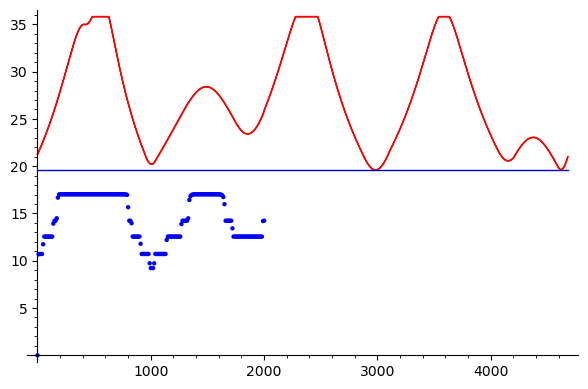

In [64]:
import numpy as np
rates = np.array(sim.serverAppStats) / 1e6 * 8 / 10
meanRates = np.sum(rates, 1)
#list_plot( plotjoined = True)
list_plot([(i * 10, meanRates[i]) for i in range(len(meanRates))]) + thruPlot

In [31]:
q=flh.GetMonitor()
print(q.SerializeToXmlString(2, True, False))

  <FlowMonitor>
    <FlowStats>
      <Flow flowId="1" timeFirstTxPacket="+0ns" timeFirstRxPacket="+2.9e+07ns" timeLastTxPacket="+3.13e+11ns" timeLastRxPacket="+3.13027e+11ns" delaySum="+1.78004e+13ns" jitterSum="+3.70829e+11ns" lastDelay="+2.7626e+07ns" txBytes="1052000000" rxBytes="684431200" txPackets="1000000" rxPackets="650600" lostPackets="349400" timesForwarded="650600">
        <delayHistogram nBins="31" >
          <bin index="26" start="0.026" width="0.001" count="200954" />
          <bin index="27" start="0.027" width="0.001" count="443900" />
          <bin index="28" start="0.028" width="0.001" count="5740" />
          <bin index="29" start="0.029" width="0.001" count="5" />
          <bin index="30" start="0.03" width="0.001" count="1" />
        </delayHistogram>
        <jitterHistogram nBins="2" >
          <bin index="0" start="0" width="0.001" count="650597" />
          <bin index="1" start="0.001" width="0.001" count="2" />
        </jitterHistogram>
        <pac

In [2]:
rx = [
    sim.serverApps.Get(idx).GetTotalRx()
    for idx
    in range(sim.serverApps.GetN())
]

round(sum(rx) / 10 / 1e6, 2), 'Mbps'

(0.0, 'Mbps')

In [296]:
cnt = {}
for i in ns.core.Simulator.getCounts():
    n, t = i.split(':')
    cnt[n] = t

for i in ns.core.Simulator.getTiming():
    n, t = i.split(':')
    if int(t) > 1000:
        # Thing, milliseconds, count, us/execution
        print(i, cnt[n], 1000 * float(t) / float(cnt[n]))
        
        

N3ns33PtrINS_21PointToPointNetDeviceEEE.MN3ns321PointToPointNetDeviceEFvNS_3PtrINS_6PacketEEEE:7715609 447245514 17.25139494635602
PN3ns311FlowMonitorE.MN3ns311FlowMonitorEFvvE:148736 10940 13595.61243144424
PN3ns314LteSpectrumPhyE.MN3ns314LteSpectrumPhyEFvvE:2124985 164305298 12.933149605437556
PN3ns315LteInterferenceE.MN3ns315LteInterferenceEFvNS_3PtrIKNS_13SpectrumValueEEEjE:194792 132851765 1.4662356950997226
PN3ns321PointToPointNetDeviceE.MN3ns321PointToPointNetDeviceEFvvE:463857 447245577 1.0371416149298218
PN3ns325MultiModelSpectrumChannelE.MN3ns325MultiModelSpectrumChannelEFvNS_3PtrINS_24SpectrumSignalParametersEEENS1_INS_11SpectrumPhyEEEE:233744 132851767 1.7594346336394608
PN3ns326RadioBearerStatsCalculatorE.MN3ns326RadioBearerStatsCalculatorEFvvE:6575 43748 150.29258480387674
PN3ns38LteUePhyE.MN3ns38LteUePhyEFvjjE:324263 51619463 6.28179723605416
PN3ns38LteUePhyE.MN3ns38LteUePhyEFvvE:16844 1548529 10.877419796464903
PN3ns39LteEnbPhyE.MN3ns39LteEnbPhyEFvNS_3PtrINS_11PacketBur